In [1]:
import csv
import random
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# read all data
def load_data(log_filepaths, data_dirs):
    samples = []
    
    for log_filepath, data_dir in zip(log_filepaths, data_dirs):
        with open(log_filepath) as csv_file:
            reader = csv.reader(csv_file)
            for line in reader:
                # skip table header
                if 'speed' in line:
                    continue
                
                sample = []
                
                ## center camera
                source_path = line[0]
                filename = source_path.split('/')[-1]
                current_path = data_dir + filename
                sample.append(current_path)
        
                ## left camera
                source_path = line[1]
                filename = source_path.split('/')[-1]
                current_path = data_dir + filename
                sample.append(current_path)
                
                ## right cammera
                source_path = line[2]
                filename = source_path.split('/')[-1]
                current_path = data_dir + filename
                sample.append(current_path)
                
                ## steering angle
                steering = float(line[3])
                sample.append(steering)
                        
                samples.append(sample)
    
    return samples

Using TensorFlow backend.


data count: 8036
data[0]:  ['datasets/data/IMG/center_2016_12_01_13_30_48_287.jpg', 'datasets/data/IMG/left_2016_12_01_13_30_48_287.jpg', 'datasets/data/IMG/right_2016_12_01_13_30_48_287.jpg', 0.0]
data count: 8036
data[0]:  ['datasets/data/IMG/center_2016_12_01_13_30_48_287.jpg', 'datasets/data/IMG/left_2016_12_01_13_30_48_287.jpg', 'datasets/data/IMG/right_2016_12_01_13_30_48_287.jpg', 0.0]


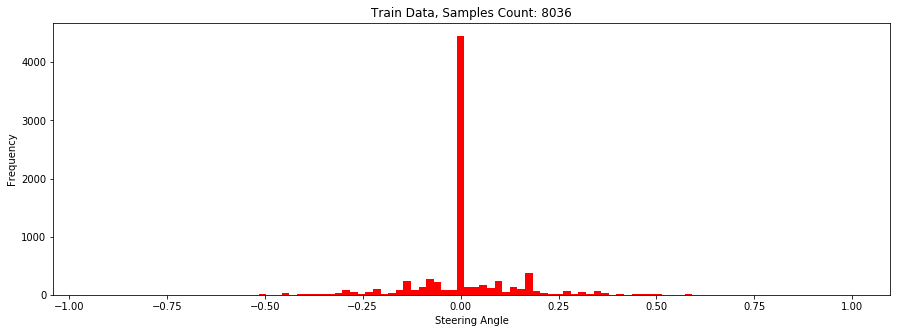

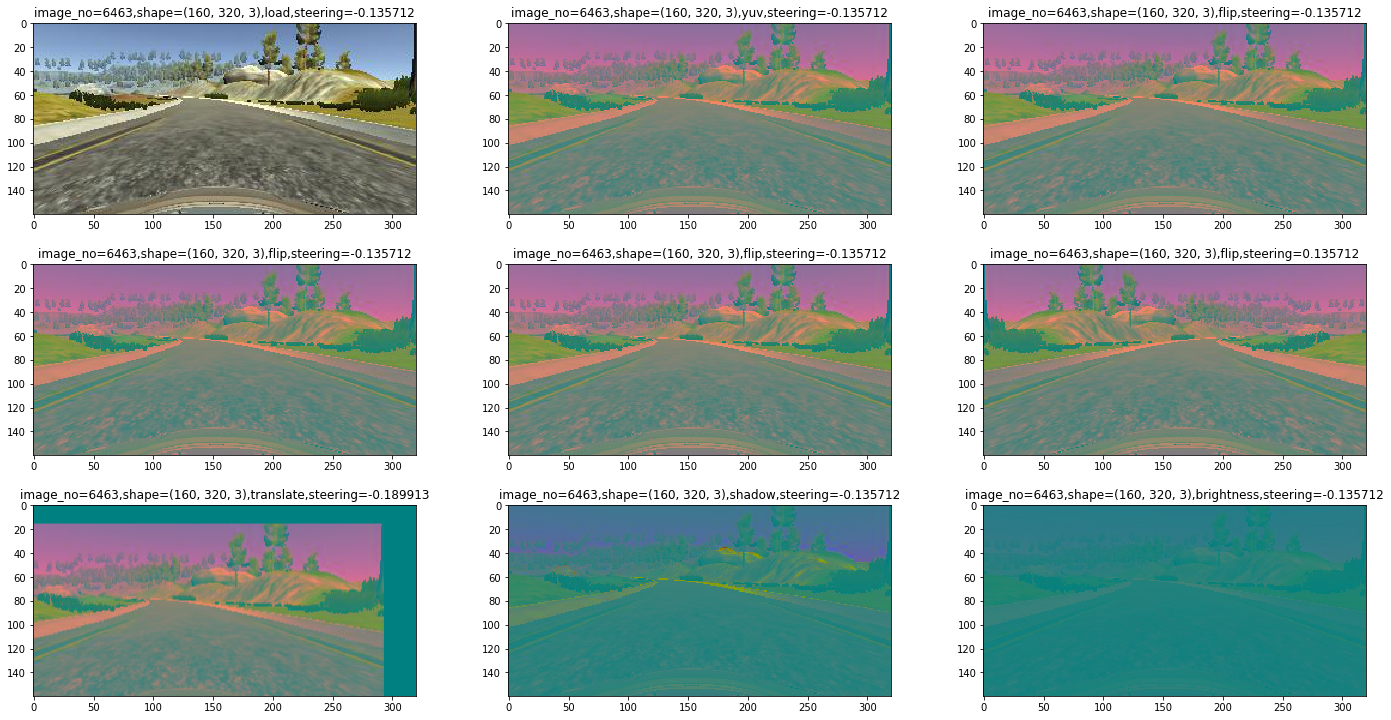

In [3]:
from model import load_image,rgb2yuv,clr_random,flip_random,translate_random,shadow_random,brightness_random,augment

data = load_data(
    ['datasets/data/driving_log.csv'],
    ['datasets/data/IMG/']
)

## data format exploration
print("data count:", len(data))
print("data[0]: ", data[0])

## data format exploration
print("data count:", len(data))
print("data[0]: ", data[0])

## data distribution exploration
steerings = [(lambda e: e[3])(e) for e in data]

plt.figure(figsize=(15,5))
plt.hist(steerings, bins=100, color='red')
plt.title("Train Data, Samples Count: %d" % (len(steerings)))
plt.xlabel("Steering Angle")
plt.ylabel("Frequency")
plt.show()


## image operation exploration
titles = []
images = []

# test loading 
index = random.randint(0, len(data))
steering = data[index][3]

image = load_image(data[index][0])
title="image_no=%d,shape=%s,load,steering=%.6f" % (index, image.shape, steering)
titles.append(title)
images.append(image)

# test rgb->yuv
new_image = rgb2yuv(image)
new_title = "image_no=%d,shape=%s,yuv,steering=%.6f" % (index, image.shape, steering)
titles.append(new_title)
images.append(new_image)

image = load_image(data[index][0])

# test flipping
for i in range(0, 4):
    new_image, flip_steering = flip_random(image, steering)
    new_image = rgb2yuv(new_image)
    new_title = "image_no=%d,shape=%s,flip,steering=%.6f" % (index, image.shape, flip_steering)
    titles.append(new_title)
    images.append(new_image)
    
# test translate
new_image, translate_steering = translate_random(image, steering)
new_image = rgb2yuv(new_image)
new_title = "image_no=%d,shape=%s,translate,steering=%.6f" % (index, image.shape, translate_steering)
titles.append(new_title)
images.append(new_image)

# test shadow
new_image = shadow_random(image)
new_image = rgb2yuv(new_image)
new_title = "image_no=%d,shape=%s,shadow,steering=%.6f" % (index, image.shape, steering)
titles.append(new_title)
images.append(new_image)

# test brightness
new_image = brightness_random(image)
new_image = rgb2yuv(new_image)
new_title = "image_no=%d,shape=%s,brightness,steering=%.6f" % (index, image.shape, steering)
titles.append(new_title)
images.append(new_image)

# plotting
assert len(titles)==len(images)
plt.figure(figsize=(20, 20))
for i in range(0, len(images)):
    plt.subplot(6, 3, i + 1)
    plt.title(titles[i], wrap=True)
    plt.imshow(np.array(images[i]))
    
plt.tight_layout()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input (InputLayer)               (None, 160, 320, 3)   0                                            
____________________________________________________________________________________________________
cropping (Cropping2D)            (None, 80, 320, 3)    0           input[0][0]                      
____________________________________________________________________________________________________
normalizing (Lambda)             (None, 80, 320, 3)    0           cropping[0][0]                   
____________________________________________________________________________________________________
resizing (Lambda)                (None, 66, 200, 3)    0           normalizing[0][0]                
___________________________________________________________________________________________

/home/sunkai/.conda/envs/carnd-term1/lib/python3.5/site-packages/keras/engine/training.py:1569: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


validation: traing sampling 1608 data.
Epoch 00000: val_loss improved from inf to 0.01202, saving model to models/nvidia_model_v5-000.h5
20020/20000 [==============================] - 68s - loss: 0.0378 - val_loss: 0.0120
Epoch 2/20
19988/20000 [============================>.] - ETA: 0s - loss: 0.0339validation: traing sampling 1608 data.
Epoch 00001: val_loss improved from 0.01202 to 0.01106, saving model to models/nvidia_model_v5-001.h5
20020/20000 [==============================] - 59s - loss: 0.0338 - val_loss: 0.0111
Epoch 3/20
19988/20000 [============================>.] - ETA: 0s - loss: 0.0308validation: traing sampling 1608 data.
Epoch 00002: val_loss improved from 0.01106 to 0.01077, saving model to models/nvidia_model_v5-002.h5
20020/20000 [==============================] - 59s - loss: 0.0308 - val_loss: 0.0108
Epoch 4/20
19988/20000 [============================>.] - ETA: 0s - loss: 0.0298validation: traing sampling 1608 data.
Epoch 00003: val_loss improved from 0.01077 to 

19988/20000 [============================>.] - ETA: 0s - loss: 0.0233validation: traing sampling 1608 data.
Epoch 00014: val_loss improved from 0.00904 to 0.00837, saving model to models/nvidia_model_v5-014.h5
20020/20000 [==============================] - 59s - loss: 0.0233 - val_loss: 0.0084
Epoch 16/20
19988/20000 [============================>.] - ETA: 0s - loss: 0.0227validation: traing sampling 1608 data.
Epoch 00015: val_loss did not improve
20020/20000 [==============================] - 59s - loss: 0.0227 - val_loss: 0.0098
Epoch 17/20
19988/20000 [============================>.] - ETA: 0s - loss: 0.0225validation: traing sampling 1608 data.
Epoch 00016: val_loss did not improve
20020/20000 [==============================] - 59s - loss: 0.0225 - val_loss: 0.0094
Epoch 18/20
19984/20000 [============================>.] - ETA: 0s - loss: 0.0222validation: traing sampling 1608 data.
Epoch 00017: val_loss did not improve
20016/20000 [==============================] - 59s - loss: 0.

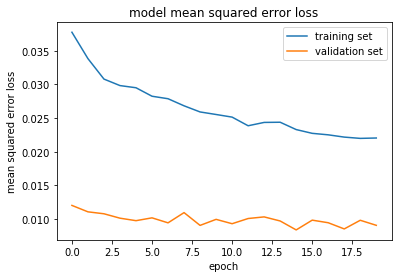

In [4]:
from model import build_nvidia_model,train_nvida_model

data = load_data(
    ['datasets/data/driving_log.csv'],
    ['datasets/data/IMG/']
)

model = build_nvidia_model()
history = train_nvida_model(model, data)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input (InputLayer)               (None, 160, 320, 3)   0                                            
____________________________________________________________________________________________________
cropping (Cropping2D)            (None, 80, 320, 3)    0           input[0][0]                      
____________________________________________________________________________________________________
normalizing (Lambda)             (None, 80, 320, 3)    0           cropping[0][0]                   
____________________________________________________________________________________________________
resizing (Lambda)                (None, 32, 32, 3)     0           normalizing[0][0]                
___________________________________________________________________________________________

/home/sunkai/.conda/envs/carnd-term1/lib/python3.5/site-packages/keras/engine/training.py:1569: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


validation: traing sampling 1608 data.
Epoch 00000: val_loss improved from inf to 0.01180, saving model to models/lenet5_model_v5-000.h5
20020/20000 [==============================] - 60s - loss: 0.0945 - val_loss: 0.0118
Epoch 2/20
19988/20000 [============================>.] - ETA: 0s - loss: 0.0795validation: traing sampling 1608 data.
Epoch 00001: val_loss improved from 0.01180 to 0.01120, saving model to models/lenet5_model_v5-001.h5
20020/20000 [==============================] - 59s - loss: 0.0795 - val_loss: 0.0112
Epoch 3/20
19988/20000 [============================>.] - ETA: 0s - loss: 0.0706validation: traing sampling 1608 data.
Epoch 00002: val_loss improved from 0.01120 to 0.01005, saving model to models/lenet5_model_v5-002.h5
20020/20000 [==============================] - 60s - loss: 0.0705 - val_loss: 0.0100
Epoch 4/20
19988/20000 [============================>.] - ETA: 0s - loss: 0.0674validation: traing sampling 1608 data.
Epoch 00003: val_loss did not improve
20020/200

20020/20000 [==============================] - 59s - loss: 0.0558 - val_loss: 0.0110
Epoch 16/20
19988/20000 [============================>.] - ETA: 0s - loss: 0.0545validation: traing sampling 1608 data.
Epoch 00015: val_loss did not improve
20020/20000 [==============================] - 59s - loss: 0.0545 - val_loss: 0.0100
Epoch 17/20
19988/20000 [============================>.] - ETA: 0s - loss: 0.0542validation: traing sampling 1608 data.
Epoch 00016: val_loss did not improve
20020/20000 [==============================] - 59s - loss: 0.0543 - val_loss: 0.0097
Epoch 18/20
19984/20000 [============================>.] - ETA: 0s - loss: 0.0531validation: traing sampling 1608 data.
Epoch 00017: val_loss did not improve
20016/20000 [==============================] - 59s - loss: 0.0531 - val_loss: 0.0098
Epoch 19/20
19988/20000 [============================>.] - ETA: 0s - loss: 0.0536validation: traing sampling 1608 data.
Epoch 00018: val_loss did not improve
20020/20000 [===============

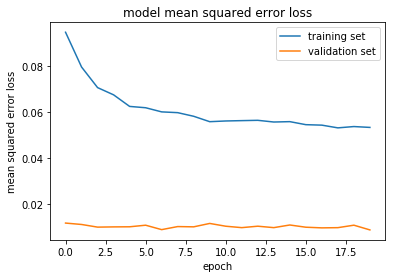

In [5]:
from model import build_lenet5_model,train_lenet5_model

model = build_lenet5_model()
history = train_lenet5_model(model, data)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()